In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.utils import shuffle


In [27]:
filename='pima-indians-diabetes.data'
cols=['preg','plas','pres','skin','test','mass','pedi','age','class']
df=pd.read_csv(filename,names=cols)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
array=df.values
X=array[:,0:8]
Y=array[:,8]

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.50);
classifier1=LogisticRegression();
classifier2=svm.SVC(kernel='rbf',probability=True);
prob1=classifier1.fit(X_train,y_train).predict_proba(X_test);
prob2=classifier2.fit(X_train,y_train).predict_proba(X_test);


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
#Compute area under the curve
fpr1,tpr1,threshold1=roc_curve(y_test,prob1[:,1])
roc_auc1=auc(fpr1,tpr1);
print("Area under the ROC curve : %f " % roc_auc1)

Area under the ROC curve : 0.830152 


In [56]:
#Compute area under the curve
fpr2,tpr2,threshold2=roc_curve(y_test,prob2[:,1])
roc_auc2=auc(fpr2,tpr2);
print("Area under the ROC curve : %f " % roc_auc2)

Area under the ROC curve : 0.795982 


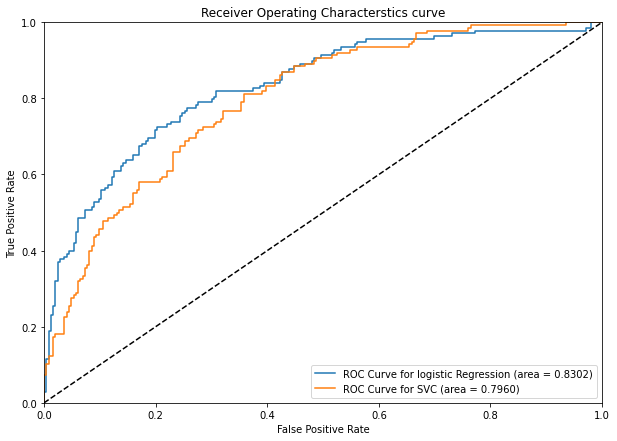

In [57]:
#Plotting the ROC Curve

pl.figure(figsize=(10,7))
pl.plot(fpr1,tpr1,label="ROC Curve for logistic Regression (area = %0.4f)"%roc_auc1)
pl.plot(fpr2,tpr2,label="ROC Curve for SVC (area = %0.4f)"%roc_auc2)
pl.plot([0,1],[0,1],'k--')
pl.xlim([0,1])
pl.ylim([0,1])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver Operating Characterstics curve')
pl.legend()
pl.show()